In [1]:
%matplotlib inline

Data types in the file:
account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object
Summary of the input file:
       account number     quantity   unit price   ext price
count     1000.000000  1000.000000  1000.000000  1000.00000
mean    535208.897000    10.328000    56.179630   579.84390
std     277589.746014     5.687597    25.331939   435.30381
min      93356.000000     1.000000    10.060000    10.38000
25%     299771.000000     5.750000    35.995000   232.60500
50%     563905.000000    10.000000    56.765000   471.72000
75%     750461.000000    15.000000    76.802500   878.13750
max     995267.000000    20.000000    99.970000  1994.80000
Basic unit price stats:
count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50

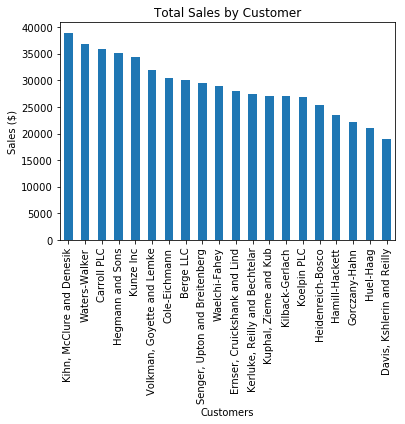

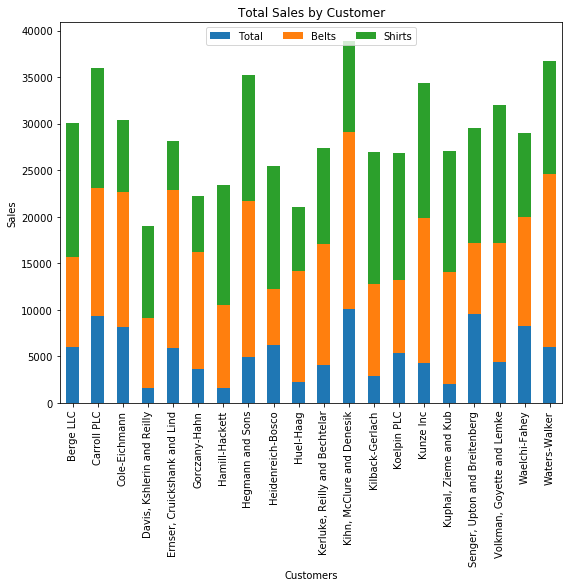

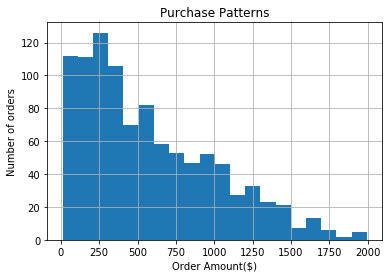

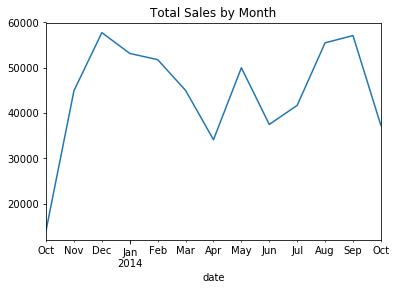

In [13]:
# Standard import for pandas, numpy and matplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the csv file and display some of the basic info
sales=pd.read_csv("sample-salesv2.csv",parse_dates=['date'])
print("Data types in the file:")
print(sales.dtypes)
print("Summary of the input file:")
print(sales.describe())
print("Basic unit price stats:")
print(sales['unit price'].describe())

# Filter the columns down to the ones we need to look at for customer sales
customers = sales[['name','ext price','date']]

#Group the customers by name and sum their sales
customer_group = customers.groupby('name')
sales_totals = customer_group.sum()

# Create a basic bar chart for the sales data and show it
bar_plot = sales_totals.sort_values(by='ext price',ascending=False).plot(kind='bar',legend=None,title="Total Sales by Customer")
bar_plot.set_xlabel("Customers")
bar_plot.set_ylabel("Sales ($)")
plt.show()

# Do a similar chart but break down by category in stacked bars
# Select the appropriate columns and group by name and category
customers = sales[['name','category','ext price','date']]
category_group = customers.groupby(['name','category']).sum()

# Plot and show the stacked bar chart
stack_bar_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(9, 7))
stack_bar_plot.set_xlabel("Customers")
stack_bar_plot.set_ylabel("Sales")
stack_bar_plot.legend(["Total","Belts","Shirts","Shoes"], loc=9,ncol=4)
plt.show()

# Create a simple histogram of purchase volumes
purchase_patterns = sales[['ext price','date']]
purchase_plot = purchase_patterns['ext price'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")
plt.show()

# Create a line chart showing purchases by month
purchase_patterns = purchase_patterns.set_index('date')
month_plot = purchase_patterns.resample('M').agg(['sum']).plot(title="Total Sales by Month",legend=None)
fig = month_plot.get_figure()

#Show the image, then save it
plt.show()
fig.savefig("total-sales.png")